In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 모델
from tensorflow import keras

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [ ]:
train_dir_name = "./Dataset/Train-Test/Female/Train/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

# 베이스 모델 설정

In [ ]:
base_model_path = model_dir_name + 'fashion_classification_female_0123_03.keras'

# 반복 실행용

In [ ]:
# end_read_point = 0
# end_save_point = 0

In [ ]:
start_read_point = end_read_point + 1
start_save_point = end_save_point + 1

print("End Read Point : " + str(end_read_point))
print("Start Read Point : " + str(start_read_point))
print()
print("End Save Point : " + str(end_save_point))
print("Start Save Point : " + str(start_save_point))

End Read Point : 8000
Start Read Point : 8001

End Save Point : 8000
Start Save Point : 8001


# Train 데이터 불러오기

In [ ]:
img_train = []
i = start_read_point - 1

while len(img_train) < 2000:
    i = i+1
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"

    if not os.path.isfile(img_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)

    img_train.append(img_rgb)
    end_read_point = i


    if len(img_train)%500 == 0: # 진행도 확인용
        print(str(len(img_train)) + "개 파일 읽기 완료")


print("Complete")


KeyboardInterrupt: 

# 이미지 확인

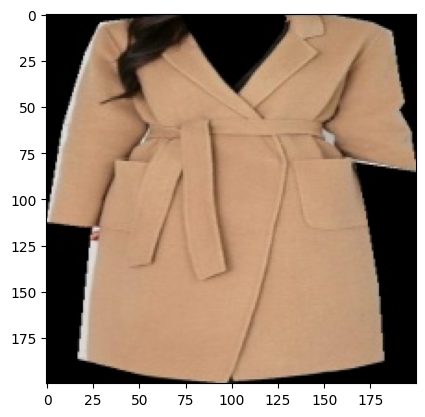

In [ ]:
plt.imshow(img_train[0])
plt.show()

# 학습을 위해 데이터 형식을 numpy로 변경

In [ ]:
img_train = np.array(img_train)
img_train.shape

(2000, 200, 200, 3)

# 모델 작성

In [ ]:
# 레이어 이름을 알기 위해
base_model = keras.models.load_model(base_model_path)
base_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

In [ ]:
class FeatureExtractor:
  def __init__(self):
    base_model = keras.models.load_model(base_model_path)
    self.model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('dense_14').output)

  def summary(self):
    self.model.summary()

  def extract(self, img):
    # 이미지는 이미 200x200 사이즈로 입력
    x = np.expand_dims(img, axis=0) # 입력 차원을 맞추기 위해
    feature = self.model.predict(x, verbose=0)[0]
    return feature / np.linalg.norm(feature)


In [ ]:
feature_model = FeatureExtractor()
feature_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

# 이미지 Feature 정보 저장

In [ ]:
save_point = start_save_point

for i in range(0, len(img_train)):
  feature = feature_model.extract(img_train[i])

  feature_path = train_dir_name + "Feature/" + str(save_point) + ".npy"
  np.save(feature_path, feature)

  if (i+1)%500 == 0: # 진행도 확인용
    print(str(save_point) + "개 파일 저장 완료")

  end_save_point = save_point
  save_point = save_point + 1

print("Complete")

6500개 파일 저장 완료
7000개 파일 저장 완료
7500개 파일 저장 완료
8000개 파일 저장 완료
Complete


# 정상적으로 저장되었는지 디렉토리 확인